*import Libraries*

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [11]:
df = pd.read_csv('./bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Dataset Description :¶
---
- **ID** : ID of the customer.

- **Age** : Age of the customer in years.

- **Experience** : Amount of work experience in years.

- **Income** : Amount of annual income (in thousands).

- **Zipcode** : Postal code of the city in which the client lives.

- **Family** : Number of family members.

- **CCAvg** : Average monthly spending with the credit card (in thousands).

- **Education** : Education level

      1 : Bachelor's degree
      2 : Master's degree
      3 : Advanced/Professional degree.
- **Mortgage**: Value of home mortgage, if any (in thousands).

- **Securities Account** : Does the customer have a securities account with the bank?

- **CD Account** : Does the customer have a certificate of deposit account (CD) with the bank?

- **Online** : Does the customer use the internet banking facilities?

- **CreditCard** : Does the customer use a credit card issued by the bank?

- **Personal Loan** : Did this customer accept the personal loan offered in the last campaign?
---
- Exploring data shape

- Verifying column name

- verifying data types using **info** function

In [12]:
# shape
df.shape

(5000, 14)

In [13]:
# column name
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Observation
---
- **General Dataset Overview :**

- **Dataset Size and Completeness:**

-  The dataset comprises 5000 entries, and there are no missing or null values present in any column (5000 non-null entries) which ensurees that the dataset  is complete with no missing values.

- **Data Types and Column Structure:**

- All columns in the dataset contain numeric data.

- The majority of columns are of integer type (int64), indicating whole numbers, such as ID, Age, Experience, Income, ZIP Code, Family, Education, Mortgage,  Personal Loan, Securities Account, CD Account, Online, and CreditCard.

- One column, 'CCAvg', is represented as a floating-point number (float64), likely indicating fractional values for average credit card spending.

- All columns have normal data types, and there are no observed data types that seem abnormal or unexpected.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observations :
---
- **Age**: Ranges from 23 to 67, with an average age of 45.34 and a moderate standard deviation of 11.46.

- **Experience**: Contains values from -3 to 43 years. While the average experience is 20.10 years, some entries show negative experience,which detects a mistake or error, potentially will require data validation or cleansing.

- **Income** : Displays wide income variability, ranging from 8 to 224. Average income is approximately 73.77, with a notable standard deviation of around 46.03, indicating a significant spread in income levels.

- **Family** : Reflects family size with values ranging from 1 to 4 family members. The dataset's average family size is about 2.40, indicating most entries are from small to medium-sized families.

- **Mortgage** :Reflects housing-related debt. Displays wide variability with an average mortgage amount of about 56.50 and a large standard deviation of approximately 101.71.

- **Personal Loan, Securities Account, CD Account, Online, CreditCard**: Binary columns representing acceptance or possession of specific banking products or services.
--- 
- Start the **Exploratory Data Analysis**.

- Verifying that there are no duplicated ID's presented in the dataset to ensure correcteness

In [16]:
df['ID'].nunique()


5000

In [17]:
df.duplicated().sum()

0

- No Duplicated ID's Presented 

- And not have any other duplicates 

- Considering the previous observations and summary, we've decided to drop the ZipCodes and ID columns as they are not conducive for further analysis or predictive modeling.

In [18]:
df.drop(['ID','ZIP.Code'],axis=1,inplace=True)

- Analyzing the distribution of class counts within our target variable.¶

In [19]:
df['Personal.Loan'].value_counts()

0    4520
1     480
Name: Personal.Loan, dtype: int64

- Among the bank's clients, a substantial majority, 4520, declined the offered personal loan, while only a smaller subset, roughly 500 individuals, accepted it.

- This also reveals a significant bias toward a particular class (0), suggesting the potential necessity for further upsampling to enhance the model's performance.

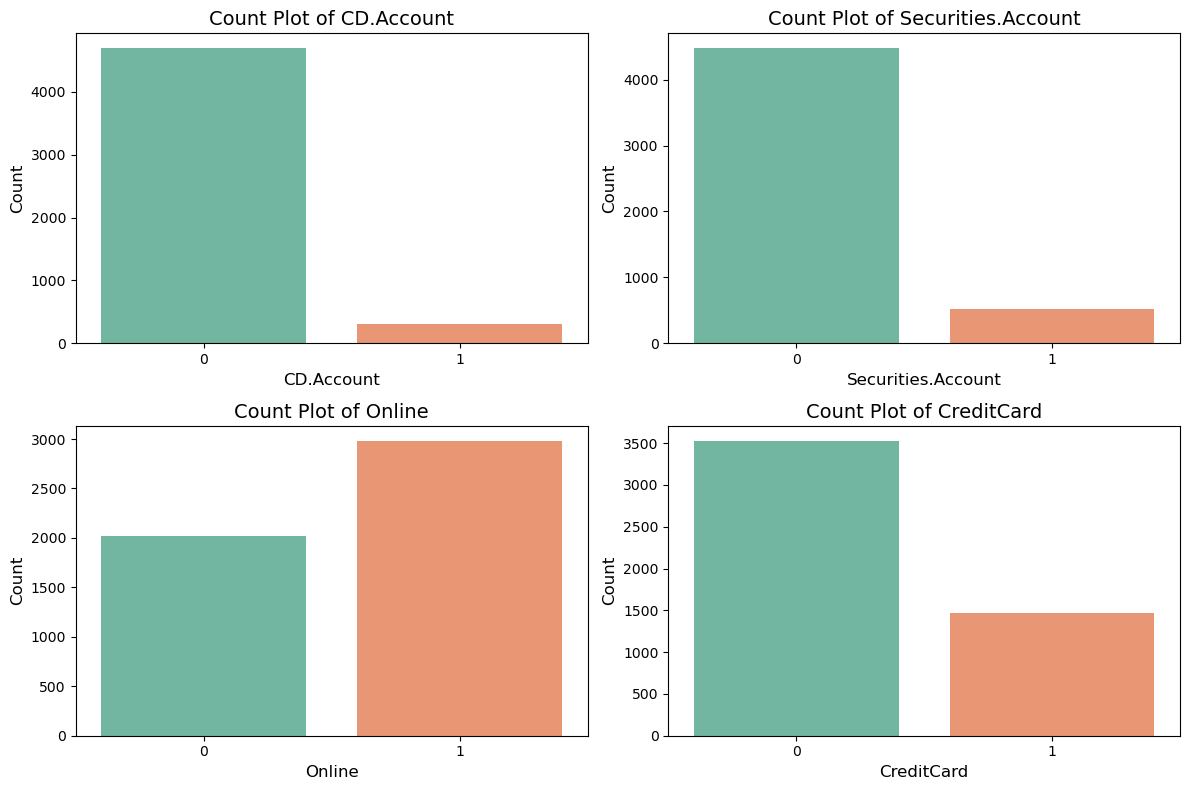

In [20]:
boolean_columns = [ 'CD.Account', 'Securities.Account', 'Online', 'CreditCard']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(boolean_columns[:4]):
    sns.countplot(x=col, data=df, ax=axes[i//2, i%2], palette='Set2')
    axes[i//2, i%2].set_title(f'Count Plot of {col}', fontsize=14)
    axes[i//2, i%2].set_xlabel(col, fontsize=12)
    axes[i//2, i%2].set_ylabel('Count', fontsize=12)
    axes[i//2, i%2].tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## Observation
---
- Most clients at this bank don't have a CD account, which shows that this service is not widely used.

- There's also a lack of securities accounts among clients, hinting at low interest or participation in the bank's investment products.

- Many clients don't use the bank's credit cards, perhaps preferring other credit options or payment methods.

- On the flip side, a significant number of clients actively use the bank's online banking services, indicating a higher adoption rate for this service.

- These observations suggests that the bank might need to reconsider or enhance its offerings in certain areas.

- There could be an opportunity to promote and make CD accounts more attractive to customers.

- The bank might need to review or promote its investment products to increase customer engagement.

- Exploring credit card features or benefits could motivate more clients to use the bank's credit cards.

- Utilizing and expanding the existing high usage of online banking services could significantly enhance overall customer satisfaction and convenience

In [21]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [22]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

- The distribution of family members appears to be evenly represented within the dataset.

- Majority of bank clients are of Bachleor's degree.

In [23]:
def rename_education(df):
    # Mapping education codes to degree names
    education_mapping = {
        1: 'Bachleor degree',
        2: 'Masters',
        3: 'Advanced/Professional'
    }

    # Calculate the mode education level for each 'Personal Loan' category
    mode_education = df.groupby('Personal.Loan')['Education'].agg(lambda x: x.mode().iloc[0])

    # Map education codes to degree names
    mode_education = mode_education.reset_index()
    mode_education['Education'] = mode_education['Education'].map(education_mapping)

    return mode_education

result = rename_education(df)
display(result)

,Personal.Loan,Education
0,0,Bachleor degree
1,1,Advanced/Professional


## Observation
---
- Among the 500 individuals who accepted the bank's offered loans, a significant majority hold advanced degrees.

- The majority of customers who did not get the loan offer hold bachelor's degrees. This might suggest that they are predominantly undergraduates or individuals early in their careers, possibly explaining their lower incomes, which could be a reason for the declined loan offers.

In [24]:
correlation = df.corr()[['Personal.Loan']].sort_values(by= 'Personal.Loan', ascending= False)
display(correlation)

,Personal.Loan
Personal.Loan,1.000000
Income,0.502462
CCAvg,0.366889
CD.Account,0.316355
Mortgage,0.142095
Education,0.136722
Family,0.061367
Securities.Account,0.021954
Online,0.006278
CreditCard,0.002802


## Observation
---
- **Based on the Correlation values with Target** :

- **Strong Influences on Personal Loan Decision:**

- Higher income and average credit card spending show moderate positive correlations with taking a personal loan.

- Having a certificate of deposit account also moderately influences opting for a personal loan.

- **Weaker Influences**:

- Education, mortgage, family size, securities account, online usage, and owning a credit card display weaker, minimal, or almost negligible correlations with personal loan decisions.

- Experience and age have weak negative correlations, indicating minor inverse influence on the outcome.
---
- **Considering the Analysis and Domain Understanding**:

- Income, CCAvg, CD Account, and Mortgage values significantly influence predicting loan acceptance. These attributes showcase notable correlations, indicating a higher likelihood of accepting a personal loan among individuals with higher incomes, increased credit card spending, possession of a CD account, and substantial mortgage values.

- Despite the negative correlation, Age remains crucial for loan acceptance prediction. While very young or elderly individuals might face challenges in loan approval, those within the middle age range are more likely to be accepted for loans.

- Number of family members can be an influential factor. Applicants with larger families and stable incomes might qualify as potential candidates for loan acceptance.

- Conversely, columns such as Securities Account, Online, and CreditCard exhibit negligible correlations with loan acceptance. These features might not significantly contribute to predicting whether a person will be accepted for a loan or not.

- Experience holds a less influential role individually. However, when considered in conjunction with age, individuals with substantial experience and average age could be preferable candidates for loan acceptance.

- This detailed conclusion sheds light on the main factors affecting loan acceptance and those with less impact. These insights aid in crafting a more accurate predictive model for loan approval.



**Data Preprocessing¶**

**Wrong entries¶**

- During the initial examination of the dataset, an anomaly was identified within the 'Experience' column, uncovering instances with negative values. It's crucial to rectify this issue as part of the data preprocessing phase.

In [25]:
df[df['Experience']< 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


- Upon closer examination, it appears that a a lot of records of the dataset contains negative values in the Experience column, signifying potential anomalies or errors within the data. To address this, we will employ the absolute function to transform these values and handle this errors.

In [26]:
df['Experience'] = abs(df['Experience'])
df[df['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


In [27]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

- The dataset is clean and does not contain any missing or null values across its columns.

- The absence of missing values ensures the dataset's cleanliness and completeness, providing a reliable foundation for analysis and modeling.

In [28]:
df.duplicated().sum()

13

- We've identified 13 duplicate rows within our dataset. 

- These duplicates will be removed to maintain the data's integrity and reliability.

In [29]:
df.drop_duplicates(inplace=True)
# Check back for duplicates.

df.duplicated().sum()

0

- Now there is no duplicate 

- we need to check the outliers 

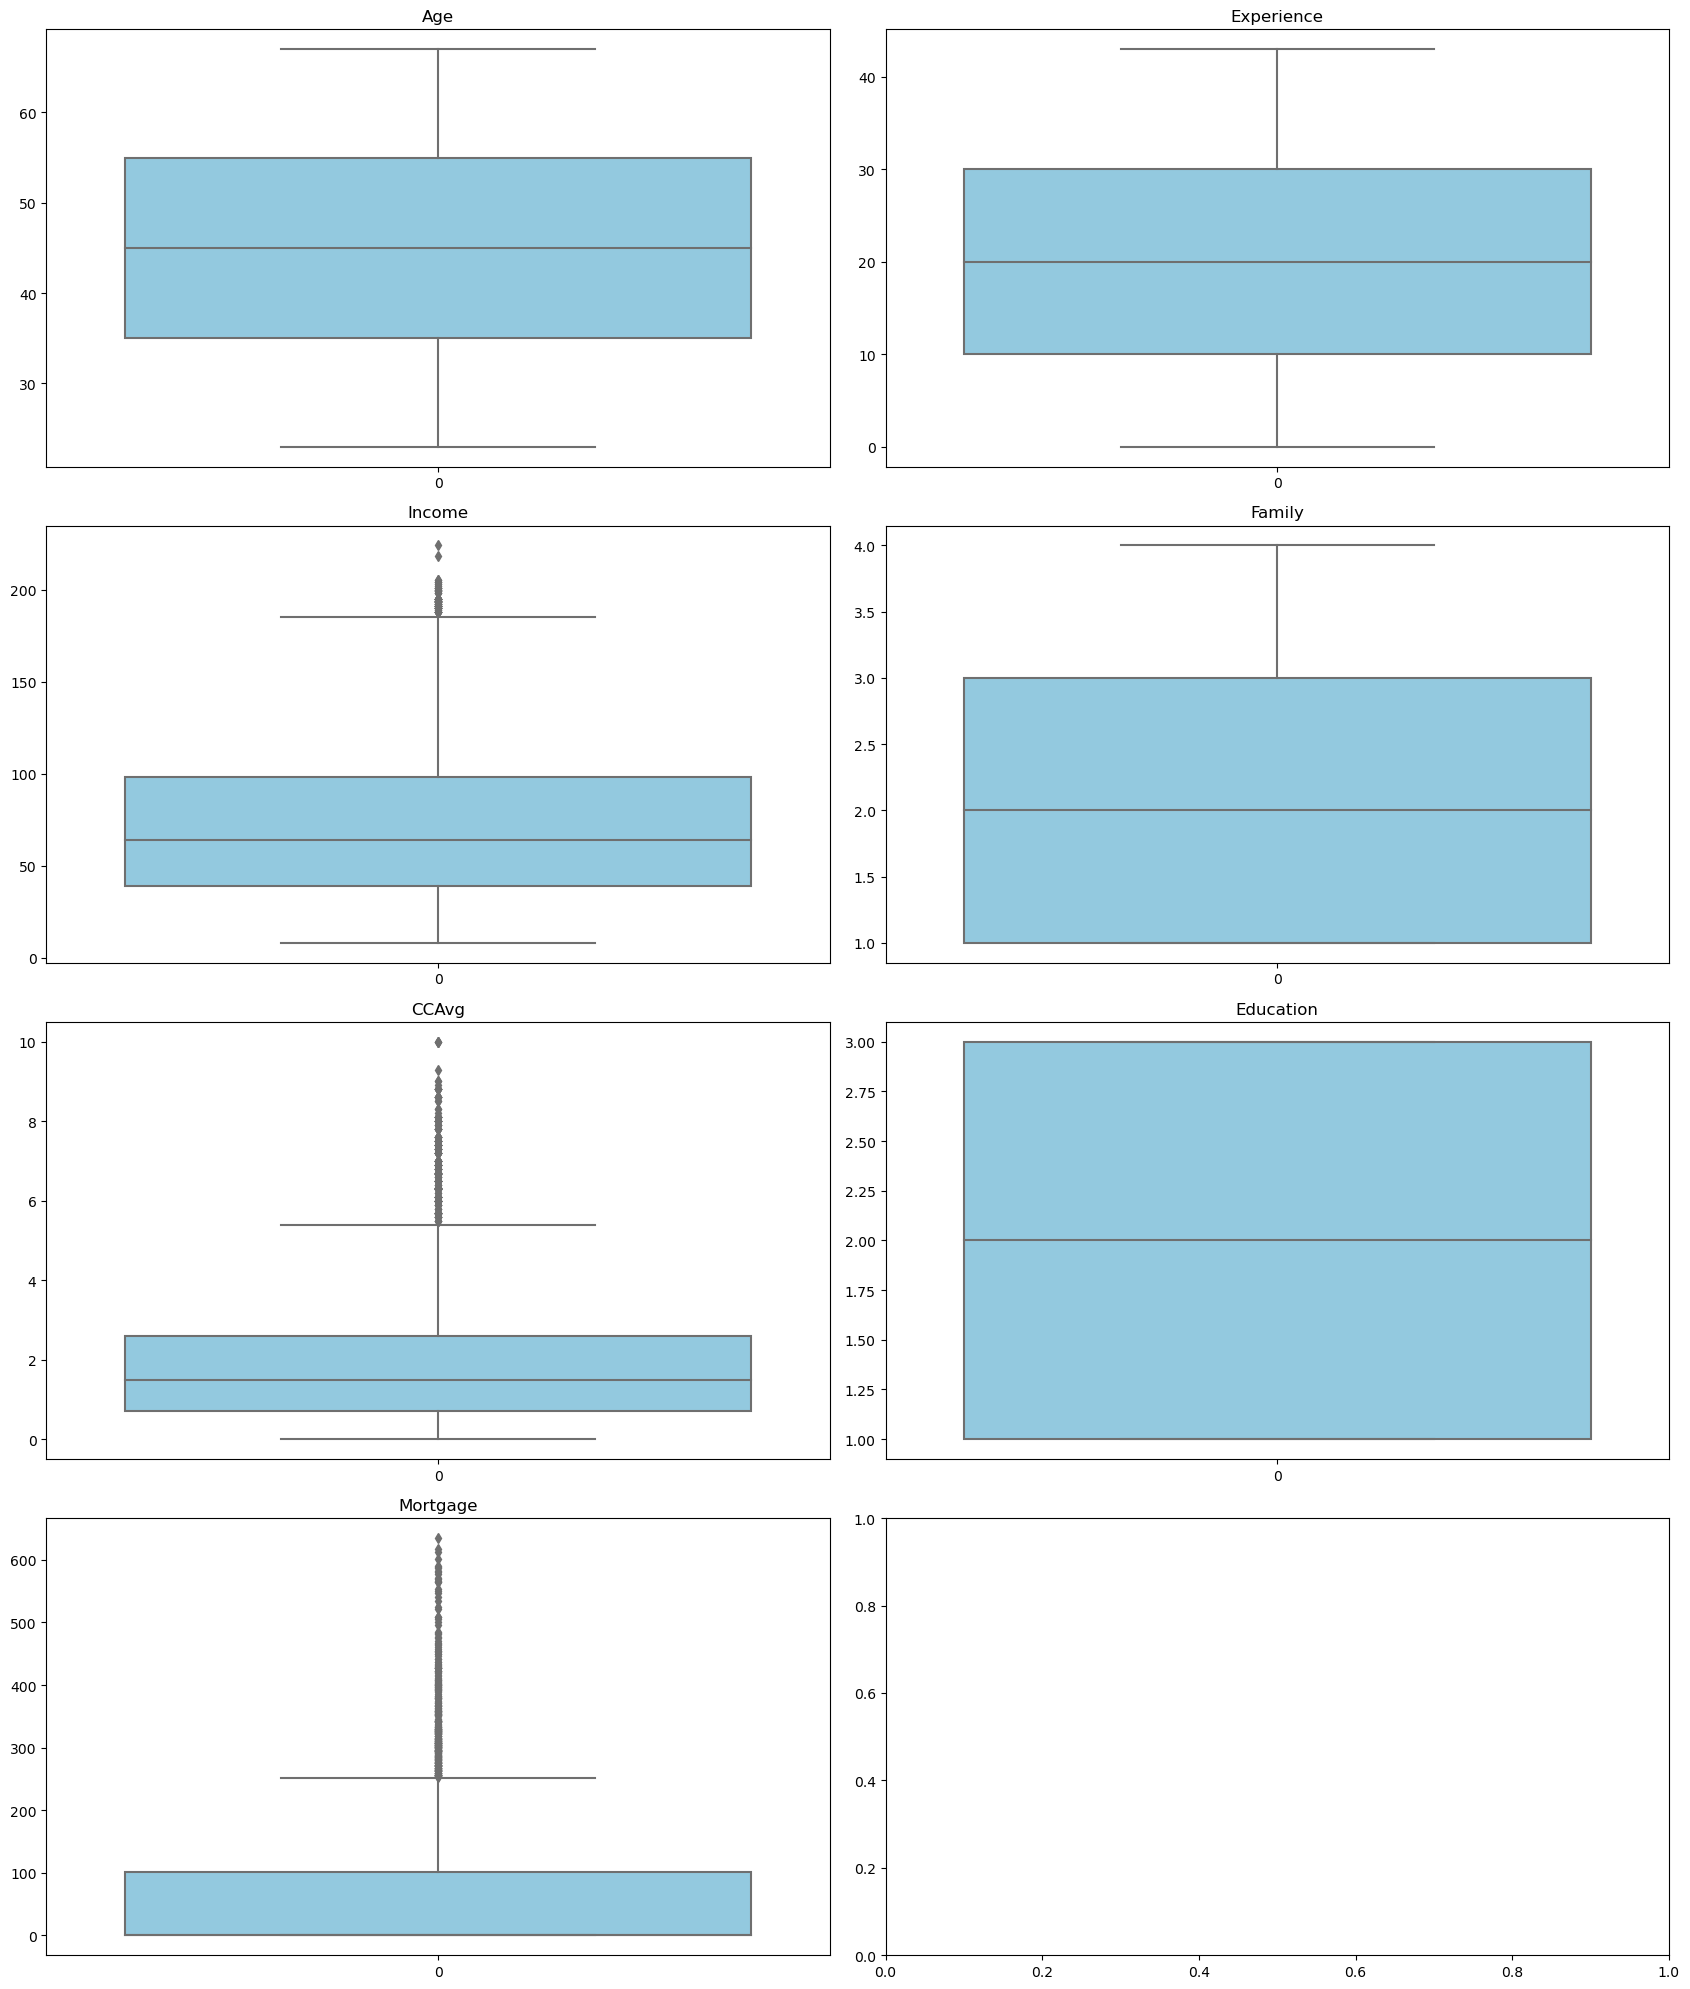

In [30]:
columns = df.drop(['Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],axis=1)

num_cols = len(columns.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of subplot rows

fig, axs = plt.subplots(num_rows, 2, figsize=(17, 5 * num_rows))

for i in range(num_rows):
    for j in range(2):
        col_idx = i * 2 + j
        if col_idx < num_cols:
            sns.boxplot(columns.iloc[:, col_idx], ax=axs[i, j], color='skyblue')
            axs[i, j].set_title(columns.columns[col_idx])

plt.tight_layout()
plt.show()

- The box plots reveal that Age, Experience, Education, and Family columns lack outliers.

- However, CCAvg, Mortgage, and Income columns exhibit a significant presence of outliers.

- Checking for the number of outliers in these columns.¶

In [31]:
def find_outliers(df):

  q1=df.quantile(0.25)

  q3=df.quantile(0.75)

  IQR=q3-q1

  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers
for col in columns.drop(['Age','Experience','Family','Education'],axis=1).columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Income : 96 ,It's Percentage is :  1.925005013033888 %


Number of outliers in CCAvg : 301 ,It's Percentage is :  6.035692801283337 %


Number of outliers in Mortgage : 291 ,It's Percentage is :  5.835171445758974 %




- The percentages of outliers is relatively low. Before addressing them, let's examine their distribution for further handling.

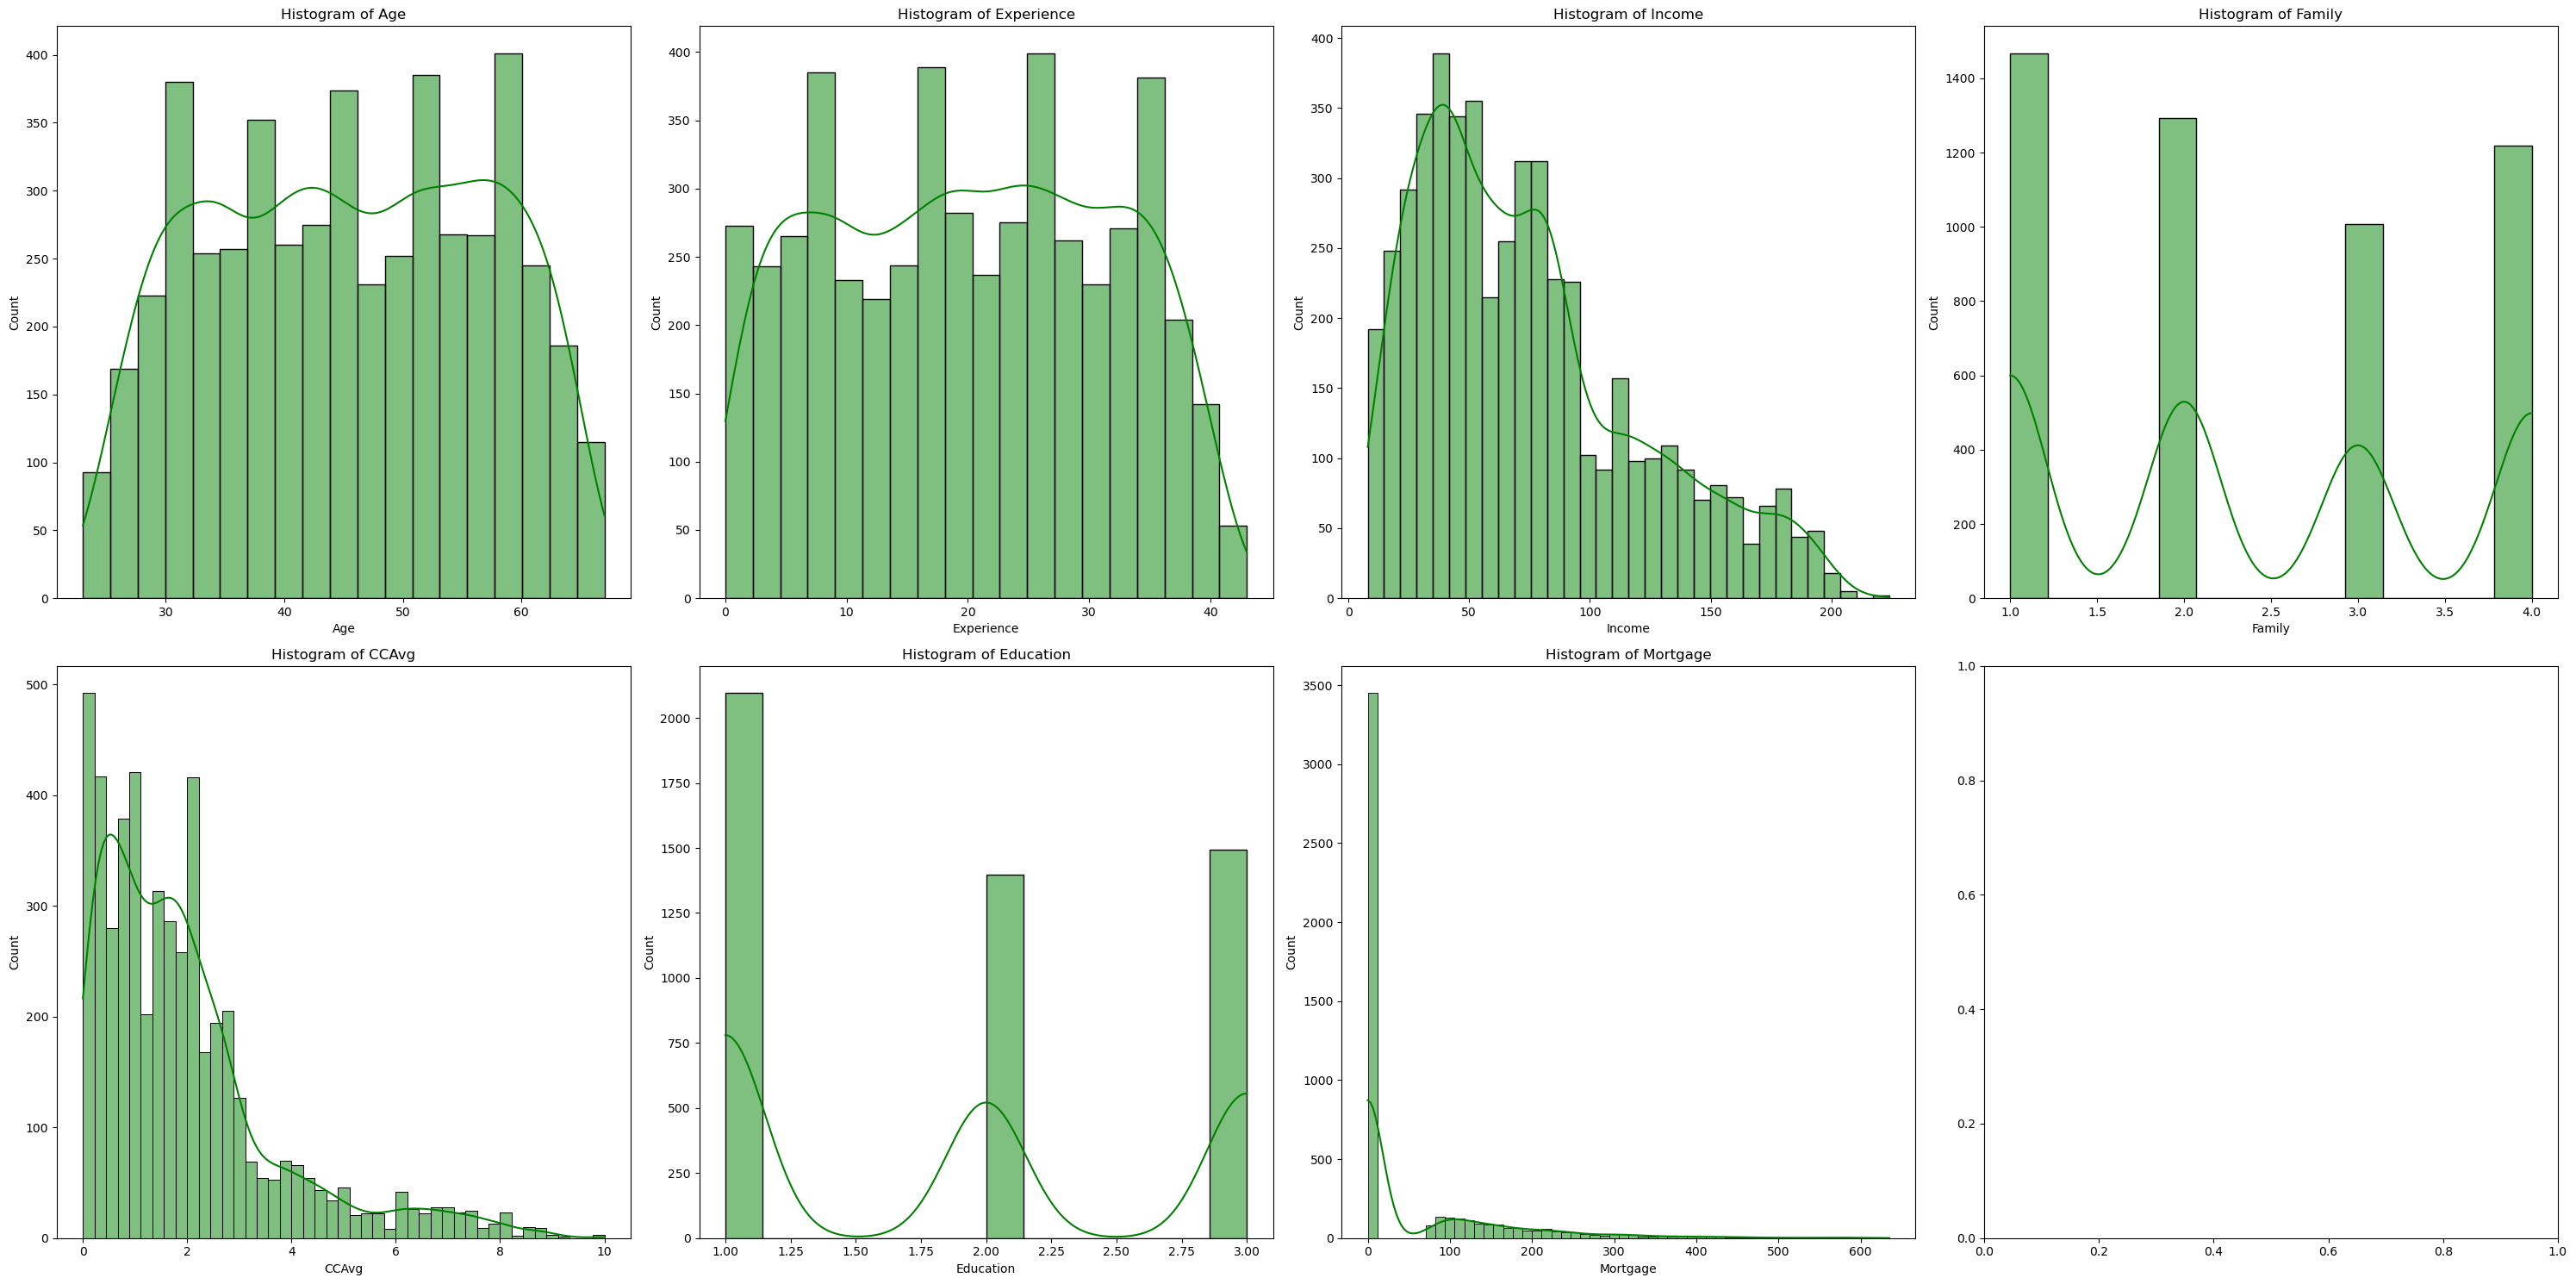

In [32]:
dist_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage']  # Example columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))

# Flattening the axes to iterate over them using enumerate
axes = axes.flatten()

for i, col in enumerate(dist_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='green')  # Plotting histogram for each specified column
    axes[i].set_title(f'Histogram of {col}')  # Setting title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Observations :
---
- Most of the columns are normally distributed except the Income , CCavg , Mortgage and this very expected due to the number of outliers presented in them.

- **Income** : The right-skewed distribution in the 'Income' column indicates that the majority of clients within this bank tend to have relatively lower incomes. This suggests that a significant portion of clients earns modestly, while a smaller fraction earns substantially higher incomes.

- **CCAvg (Average Credit Card Spending)** : The right-skewed distribution in the 'CCAvg' column implies that most clients exhibit lower average spending on credit cards with zero is the most frequent value which indiciates that some of the clients does not spend using their credit card at all. This trend indicates that a majority of customers tend to have conservative spending habits on credit cards, with a few outliers who spend considerably higher amounts .

- **Mortgage** : The right-skewed distribution of the 'Mortgage' column suggests that the majority of clients in this bank may not have substantial housing-related debts. It indicates that a larger segment of clients either do not hold mortgage loans or maintain lower mortgage amounts. However, there is a smaller subset with comparatively higher mortgage values.

- The bank's customers primarily have majority of individuals with bachelor's degrees.

- Majority of clients seem to belong to households with only one family member.

- We can also observe that the age and experience columns match together with the same frequencies where higher ages values have the same frequncy of higher experinces and the opposite.

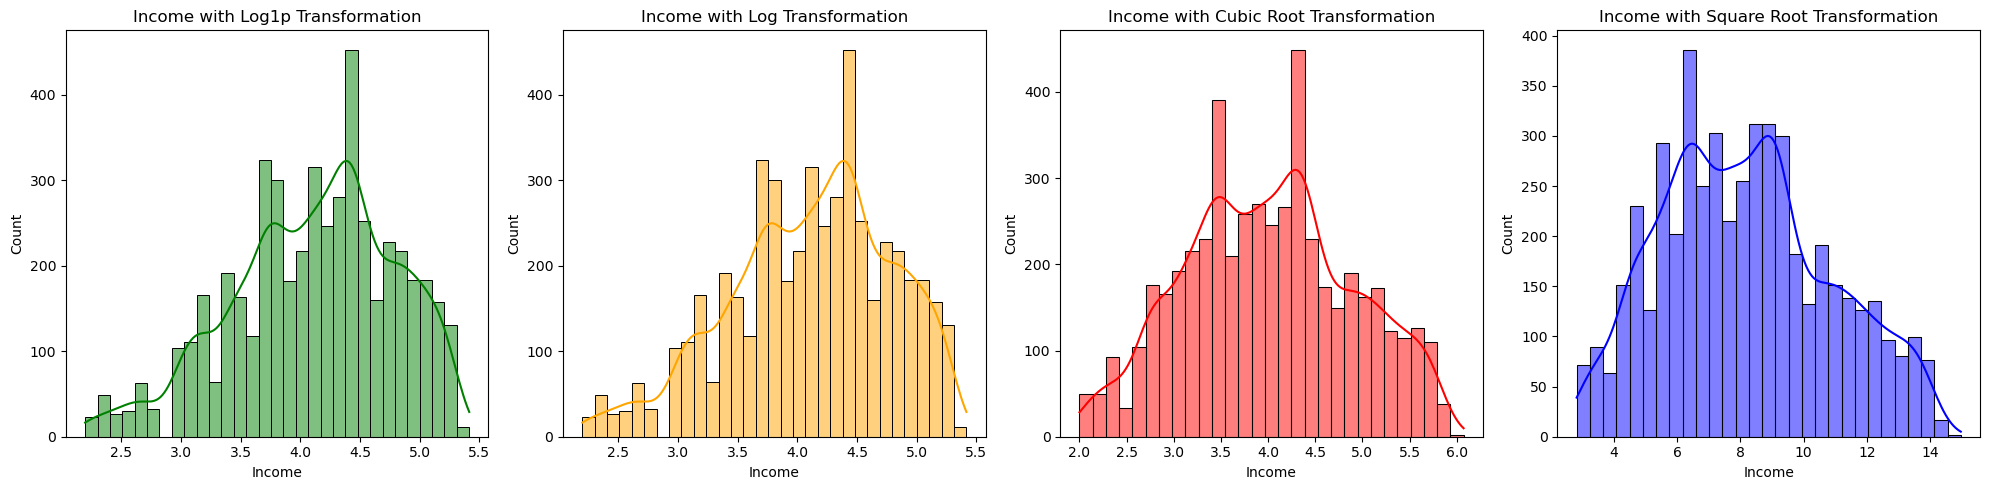

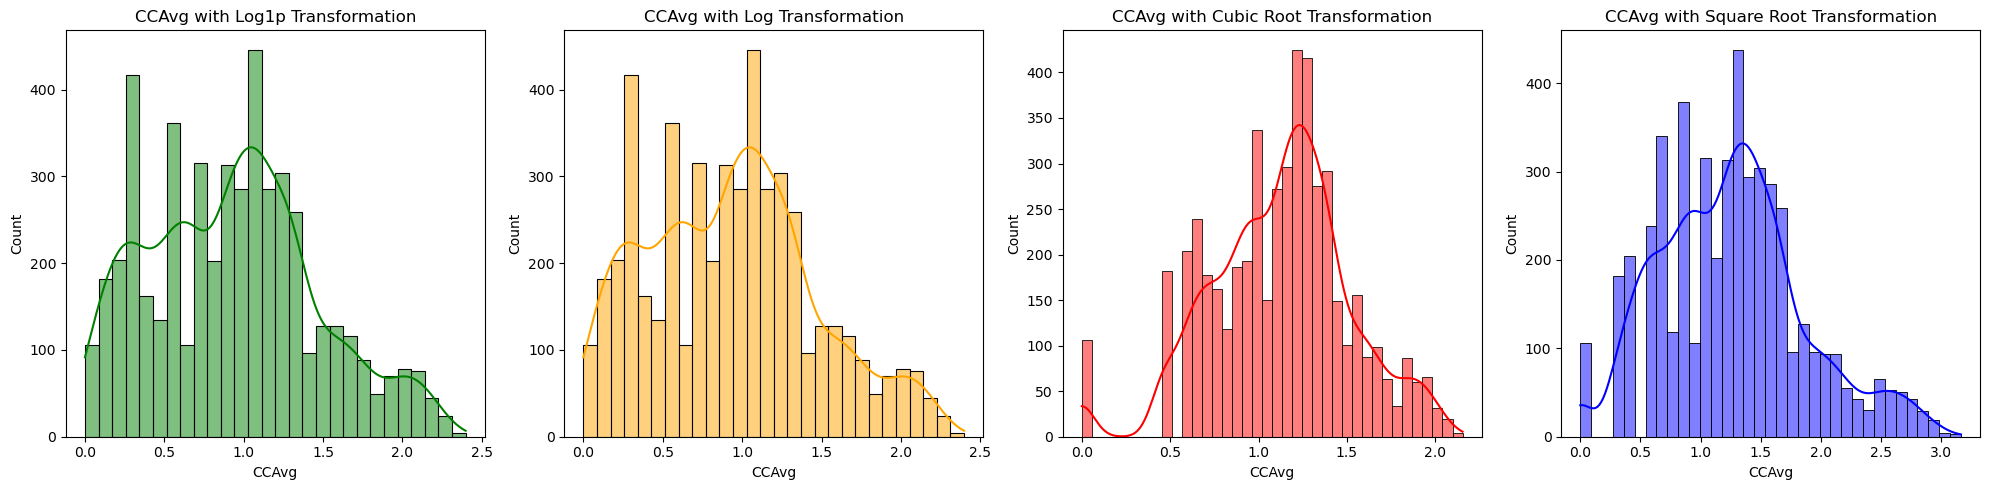

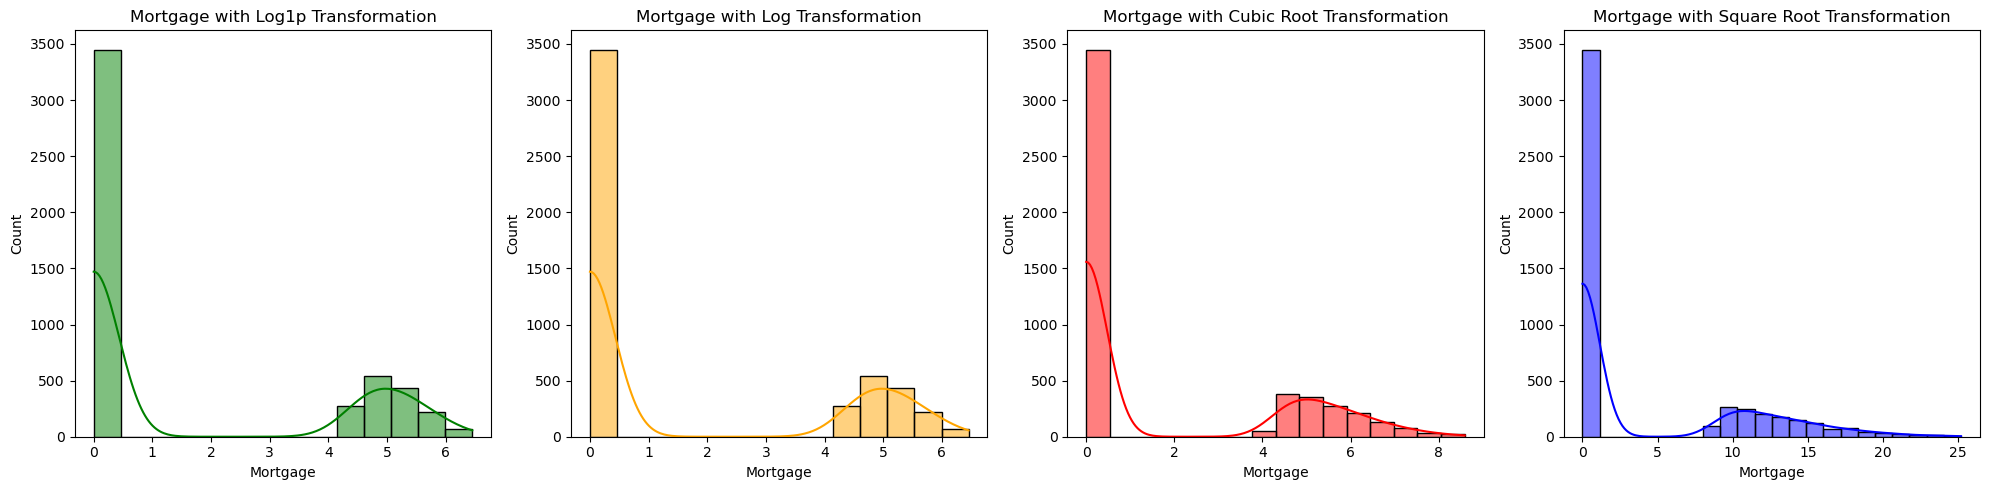

In [33]:
# Evaluating Various Transformation Methods for Skewed Columns.
skewed_columns =['Income','CCAvg','Mortgage']

for col in skewed_columns:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots

    # Log1p Transformation
    sns.histplot(np.log1p(df[col]), color='green', ax=axes[0],kde=True)
    axes[0].set_title(f'{col} with Log1p Transformation')

    # Log Transformation
    sns.histplot(np.log(df[col] + 1), color='orange', ax=axes[1],kde=True)
    axes[1].set_title(f'{col} with Log Transformation')

    # Cubic Root Transformation
    sns.histplot(np.cbrt(df[col]), color='red', ax=axes[2],kde=True)
    axes[2].set_title(f'{col} with Cubic Root Transformation')

    # Square Root Transformation
    sns.histplot(np.sqrt(df[col]), color='blue', ax=axes[3],kde=True)
    axes[3].set_title(f'{col} with Square Root Transformation')
    
    plt.tight_layout()
    plt.show()
    print('\n')
    

## Observation
---
- **Income and CCAvg Columns** : The cubic root transformation appears to be the most suitable method for these columns.

- **Mortgage Column** : The square root transformation seems to yield better results for this column.

In [34]:
df['Income'] = np.cbrt(df['Income'])
df['CCAvg'] = np.cbrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

# Let's re-examine the values of outliers again.
for col in columns.drop(['Age','Experience','Family','Education'],axis=1).columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Income : 0 ,It's Percentage is :  0.0 %


Number of outliers in CCAvg : 109 ,It's Percentage is :  2.1856827752155605 %


Number of outliers in Mortgage : 1 ,It's Percentage is :  0.020052135552436335 %




- Outliers have been significantly reduced in number. To handle the remaining outlier values, we'll substitute them with the upper and lower limits specifically for the 'CCAvg' and 'Mortgage' columns.

In [35]:
def replace_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

for col in ['CCAvg','Mortgage']:
    lower_limit, upper_limit = replace_outlier(df[col]) #lower and upper range
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

for col in columns.drop(['Age','Experience','Family','Education'],axis=1).columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")


Number of outliers in Income : 0 ,It's Percentage is :  0.0 %


Number of outliers in CCAvg : 0 ,It's Percentage is :  0.0 %


Number of outliers in Mortgage : 0 ,It's Percentage is :  0.0 %




- **Features Scaling.¶**

- We'll apply the Standardization method to scale our data, enhancing the model's performance and ensuring standardized ranges of values for improved processing.

In [36]:
standard_scaler = StandardScaler()

df_scaled = df.copy()

column = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage']

for col in column: 
       df_scaled[col] = standard_scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,-1.775590,-1.677757,-0.391426,1.397399,0.101777,-1.047290,-0.637708,0,1,0,0,0
1,-0.030341,-0.100306,-0.864208,0.525860,0.036858,-1.047290,-0.637708,0,1,0,0,0
2,-0.553916,-0.450851,-2.008309,-1.217219,-0.340552,-1.047290,-0.637708,0,0,0,0,0
3,-0.902966,-0.976668,0.715108,-1.217219,0.683013,0.143778,-0.637708,0,0,0,0,0
4,-0.902966,-1.064304,-0.506793,1.397399,-0.340552,0.143778,-0.637708,0,0,0,0,1


- Based on the Analysis and Correlation results, the selected features for inclusion are `Income, CCAvg, Mortgage, Family, Education, CreditCard, CDAccount, Age, and Experience`.

In [37]:
X =  df_scaled.drop(['Personal.Loan','Securities.Account','Online'],axis=1)
y = df_scaled['Personal.Loan']

print (" Number of columns in our Features : ", X.shape[1])

 Number of columns in our Features :  9


We currently have a total of 8 columns within our features.

In [38]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'CD.Account', 'CreditCard'],
      dtype='object')

Splitting the Dataset into Training and Testing Subsets¶

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.4, random_state= 42)

- **Upsampling¶**
  
- We previously identified our target variable as Personal Loan , 

- Our analysis indicates a significant bias towards one class, 

- with over three-fourths of our data assigned to class 0, totaling over 4500 records. 

- To address this class imbalance, we aim to implement upsampling for the minority class (class 1) in our dataset.

In [43]:
from sklearn.utils import resample
import pandas as pd

# Combine X_train and y_train for easy handling
train = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train[train['Personal.Loan'] == 0]
minority_class = train[train['Personal.Loan'] == 1]

# Print original class distribution
print("Before UpSampling, counts of class '0':", len(majority_class),"\n")
print("Before UpSampling, counts of class '1':", len(minority_class), "\n")

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,                 # sample with replacement
                              n_samples=len(majority_class),# match majority class
                              random_state=42)              # reproducible

# Combine upsampled minority and majority class
upsampled_train = pd.concat([majority_class, minority_upsampled])

# Separate features and target
X_train_upsampled = upsampled_train.drop('Personal.Loan', axis=1)
y_train_upsampled = upsampled_train['Personal.Loan']

# Print new class distribution
print("After UpSampling, counts of class '0':", sum(y_train_upsampled == 0),"\n")
print("After UpSampling, counts of class '1':", sum(y_train_upsampled == 1), "\n")



Before UpSampling, counts of class '0': 2699 

Before UpSampling, counts of class '1': 293 

After UpSampling, counts of class '0': 2699 

After UpSampling, counts of class '1': 2699 



- Following the upsampling process, Our target column now exhibits a balanced distribution between the two classes. 

- With this class balance achieved, our dataset is now prepared for modeling
---
- Iterating through different values of min_samples_split and max_depth aims to identify the optimal combination that maximizes accuracy in the Decision Tree Classifier.¶

In [47]:
max_depth_values = range(1, 50)

# Lists to store performance metric scores
train_scores = []
test_scores = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Create Plotly figure
fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Scatter(x=list(max_depth_values), y=train_scores, mode='lines', name='Train Accuracy'))

# Add testing accuracy trace
fig.add_trace(go.Scatter(x=list(max_depth_values), y=test_scores, mode='lines', name='Test Accuracy'))

# Update layout
fig.update_layout(
    title='Max Depth vs. Accuracy',
    xaxis=dict(title='Max Depth'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

# Show the interactive plot
fig.show()

- Based on the graph above, the model achieves its highest testing accuracy at a max depth of 8. 

- Notably, the training accuracy at this depth is also very close to the testing accuracy, indicating that the model is not overfitting.

In [48]:
min_samples_split_values = range(2, 30)  # Example range for min_samples_split

# Lists to store performance metric scores
train_scores = []
test_scores = []

for split in min_samples_split_values:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=train_scores, mode='lines', name='Train Accuracy'))

# Add testing accuracy trace
fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=test_scores, mode='lines', name='Test Accuracy'))

# Update layout
fig.update_layout(
    title='Min Samples Split vs. Accuracy',
    xaxis=dict(title='Min Samples Split'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

# Show the interactive plot
fig.show()

- Additionally, from the graph portraying min_samples, it's evident that min_samples = 8 achieves the highest testing accuracy. 

- Moreover, it maintains a reasonably good training accuracy, implying it could be the optimal value to mitigate overfitting.

- Creating a DecisionTreeClassifier instance with :
     - Maximum depth = 8
     - Minnimum sample split = 8.

In [49]:
Decision_Tree = DecisionTreeClassifier(max_depth=8, min_samples_split=8,criterion='entropy', random_state=42)

In [50]:
Decision_Tree.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=8,
                       random_state=42)

In [51]:
y_pred_train = Decision_Tree.predict(X_train_upsampled)
y_pred_test = Decision_Tree.predict(X_test)
train_accuracy = accuracy_score(y_train_upsampled, y_pred_train)
print(" Decision Tree Training Accuracy :" ,round(train_accuracy,2)*100)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(" Decision Tree Testing Accuracy :" ,round(test_accuracy,2)*100)

 Decision Tree Training Accuracy : 99.0
 Decision Tree Testing Accuracy : 98.0


- The notable difference between the training accuracy (99%) and testing accuracy (98%) could suggest potential overfitting. 

- Nevertheless, in this scenario, the marginal gap (1%) implies the model performs well 
in generalizing to unseen data without substantial overfitting.

- To further confirm this observation, let's assess the model's performance using cross-validation scores.

In [61]:
cv_scores_train = cross_val_score(Decision_Tree, X_train_upsampled, y_train_upsampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores on Training Data:  ", cv_scores_train)
print("\n" "Mean Accuracy from Cross-Validation : ", cv_scores_train.mean())

Cross-Validation Scores on Training Data:   [0.99166667 0.98981481 0.98981481 0.9823911  0.98609824]

Mean Accuracy from Cross-Validation :  0.9879571276559227


## Based on the Cross Validation values f 5 folds :

- The individual cross-validation scores indicate that the model performed well consistently across different subsets of the training data, 
- with accuracy scores ranging from approximately 97.7% to 98.7% on each fold.

- The mean accuracy of approximately 98.3% suggests that the model, on average, achieved an accuracy of around 98.3% across the different cross-validation folds. 
- Overall, these results indicate that the model is performing well and generalizes effectively to unseen subsets of the training data, achieving high accuracy across multiple data splits during cross-validation.
---
- To further validate the model's performance, let's examine its Confusion Matrix and Classification Report.

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1781,27
Actual Positive,16,171


## Based on this Confusion matrix Evaluation :
---
- 1780 ,instances were correctly predicted as class 0 (True Negatives).

- 175 ,instances were correctly predicted as class 1 (True Positives).

- 28 instances were predicted as class 1 but were actually class 0 (False Positives).

- 12 instances were predicted as class 0 but were actually class 1 (False Negatives)

In [58]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1808
           1       0.86      0.91      0.89       187

    accuracy                           0.98      1995
   macro avg       0.93      0.95      0.94      1995
weighted avg       0.98      0.98      0.98      1995



**Based on the insights gained from the confusion matrix and classification report, we can draw the following conclusions :**

- Out of 187 entries for class 1, the model predicted 12 wrong.

- Out of 1780 entries for class 0, the model predicted 28 wrong.

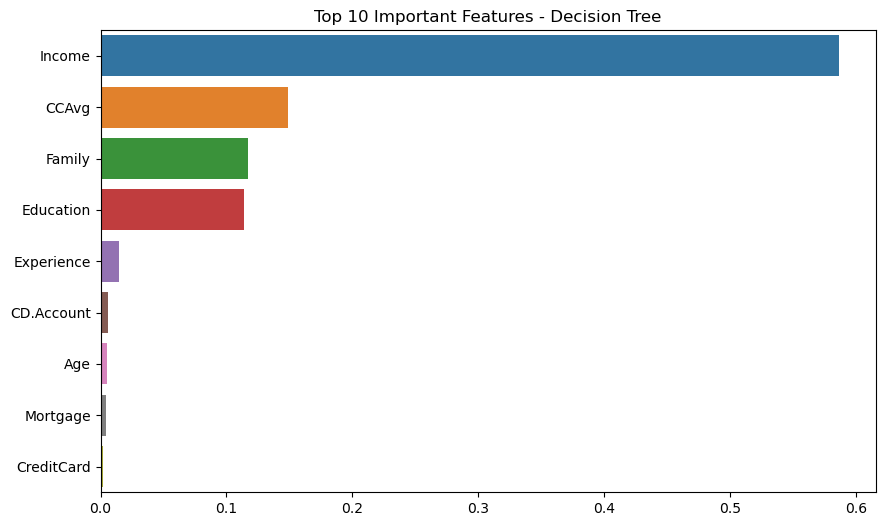

In [67]:
importances = pd.Series(Decision_Tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features - Decision Tree")
plt.show()


- Income is by far the most influential feature in predicting personal loan acceptance.

- Credit card average spending (CCAvg), Family size, and Education level are also strong predictors.

- Features like Mortgage, CreditCard, and CD.Account contribute very little to the decision-making process in this tree.

